# Grupo:
164213 - Andreza Aparecida dos Santos 

Leonardo Maçal 

Ligia Vasconcelos


Tarefa:

Você deve tentar classificar os tipos de dados faltantes como:
* MCAR (Missing Completely at Random): Os dados faltantes não estão relacionados às variáveis (dependentes ou independentes). Por exemplo, quando a falta de informação se deveu à perda de acompanhamento do paciente em virtude de ele ter mudado de residência por motivos alheios ao estudo.

* MAR (Missing at Random): Os dados faltantes podem depender do que é observado (variáveis dependentes ou independentes), mas ela não depende dos valores que estão faltando. Por exemplo, a falta de informação sobre uma variável A depende de outra variável B, mas não depende dos valores de A que estão faltando.

* MNAR (Missing not at Random): Os dados faltantes dependem do que não é observado. Nesse caso, as variáveis observadas não explicam completamente a falta dos dados. Por exemplo, a falta de informação sobre uma variável A que depende de B é mais frequente para certos valores de A do que outros, mesmo após compararem  variável B. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data_path = "heart/raw/heart.csv"
missing_age_data_path = "heart/processed/heart-missing-age.csv"
missing_sex_data_path = "heart/processed/heart-missing-sex.csv"
missing_chol_data_path = "heart/processed/heart-missing-chol.csv"

In [3]:
age_df = pd.read_csv(missing_age_data_path)
sex_df = pd.read_csv(missing_sex_data_path)
chol_df = pd.read_csv(missing_chol_data_path)

# Missing Age Dataset

Análise do dataset de idade faltante

In [4]:
age_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Criamos uma nova columa para denominada "missing_age" para mapear as linhas do banco de dados em que falta esse dado. Para as posições em que não temos a informação de idade, a coluna "missing_age" assume valor 1 (um), para as demais posições onde esse dado está presente, assume valor 0 (zero).

In [8]:
age_df['missing_age'] = np.where(age_df['age'].isnull(), 1, 0)

In [9]:
age_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


Primeiramente podemos verificar se existe alta correlação negativa ou positiva entre a coluna faltante e as demais informações. Isso pode nos dar uma ideia de possível comportamento para as ocorrências de dados faltantes.

In [10]:
age_df[age_df.columns[:]].corr()['missing_age']

age                 NaN
sex           -0.539194
cp             0.011762
trestbps       0.122651
chol           0.116199
fbs           -0.009940
restecg       -0.039050
thalach        0.104246
exang         -0.103568
oldpeak       -0.038064
slope          0.060080
ca            -0.102480
thal          -0.121596
target         0.171961
missing_age    1.000000
Name: missing_age, dtype: float64

Podemos ver que nossos dados de sexo e dados faltantes de idade (missing_age) possuem um valor alto de correlação negativa. Isso significa que, para esses dois conjuntos de dados, quando o valor em um conjunto aumenta, o valor correspondente no outro conjunto tende a a diminuir.

Para as demais correlações, observamos valores de correlação muito próximos de zero, indicando que não possuem um comportamento possivelmente correlacionados.

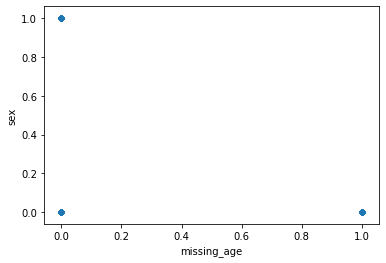

In [19]:
age_df.plot.scatter("missing_age", "sex")

Após plotar os dados no espaço, podemos ver com quando os dados de sexo assumem valor 0 (zero),
temos tanto a presença (missing_age = 0) quanto a falta (missing_age = 1) de dados de idade.
Porém quando olhamos para o comportamento quando os dados de sexo assumem valor 1 (um), não
temos o mesmo comportamento, não existindo dados faltantes (missing_age = 1) para esse valor de sexo.


Podemos ainda, verificar se dentro do conjunto de dados faltantes, se existe alguma relação entre os valores das demais variáveis. Vamos plotar os gráficos da variável "missing_age" com cada uma das demais para verificar se podemos extrair da análise visual algum tipo de comportamento

In [40]:
missing_df = age_df.loc[age_df['missing_age'] == 1]

In [41]:
missing_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
14,NaN,0,3,150,283,1,0,162,0,1.0,2,0,2,1,1
17,NaN,0,3,150,226,0,1,114,0,2.6,0,0,2,1,1
19,NaN,0,3,140,239,0,1,151,0,1.8,2,2,2,1,1
36,NaN,0,2,135,304,1,1,170,0,0.0,2,0,2,1,1
39,NaN,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1
40,NaN,0,2,140,308,0,0,142,0,1.5,2,1,2,1,1
43,NaN,0,0,130,264,0,0,143,0,0.4,1,0,2,1,1
49,NaN,0,0,138,234,0,0,160,0,0.0,2,0,2,1,1
53,NaN,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1


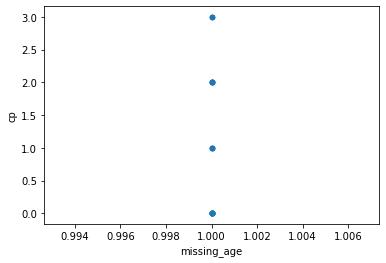

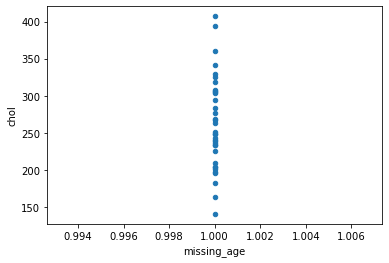

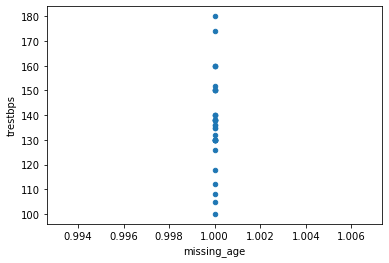

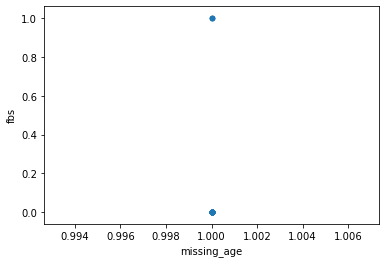

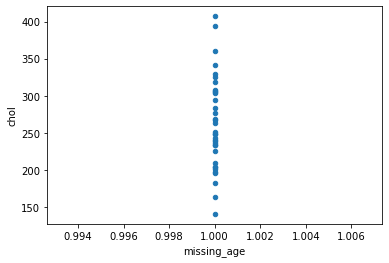

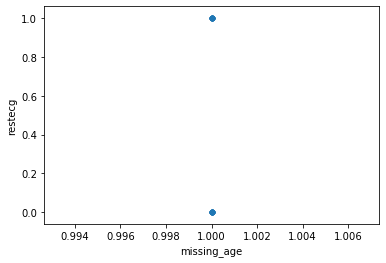

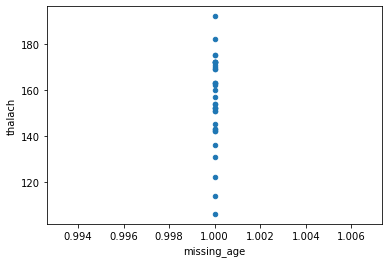

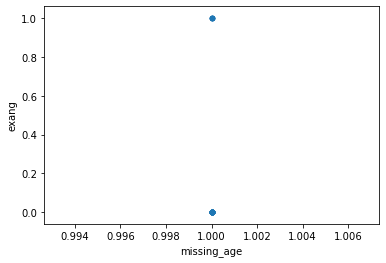

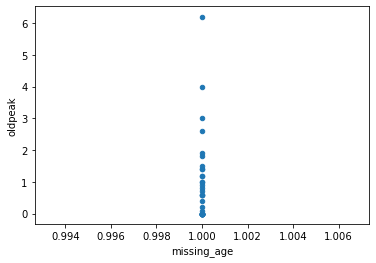

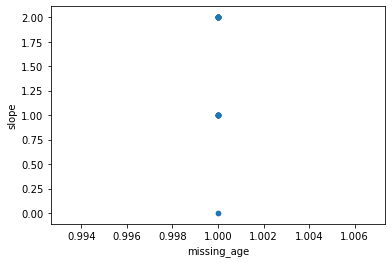

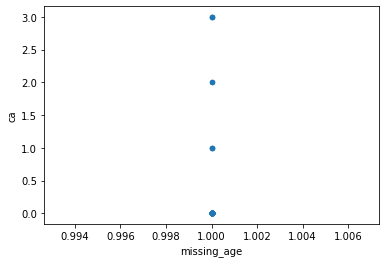

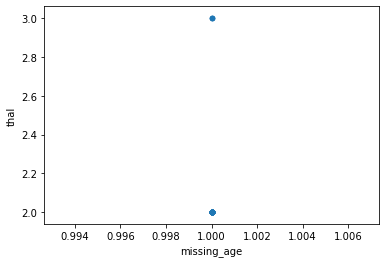

In [50]:
missing_df.plot.scatter("missing_age", "cp")
missing_df.plot.scatter("missing_age", "chol")
missing_df.plot.scatter("missing_age", "trestbps")
missing_df.plot.scatter("missing_age", "fbs")
missing_df.plot.scatter("missing_age", "chol")
missing_df.plot.scatter("missing_age", "restecg")
missing_df.plot.scatter("missing_age", "thalach")
missing_df.plot.scatter("missing_age", "exang")
missing_df.plot.scatter("missing_age", "oldpeak")
missing_df.plot.scatter("missing_age", "slope")
missing_df.plot.scatter("missing_age", "ca")
missing_df.plot.scatter("missing_age", "thal")

Desses gráficos mostrados acima, observamos que a distribuição de cada variável dentro desse conjunto parece se distribuir de forma uniforme. Concluindo-se que não há nenhuma tendência de comportamento entre os dados faltantes e os demais dados da tabela.

Sendo assim, podemos classificar essa falta de dados de idade como MAR (Missing at Random) por estar dependente do sexo 0 (zero), mas não dos valores faltantes de idade.

# Missing Sex Dataset

Análise do dataset de sexo faltante

In [12]:
sex_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1.0,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1.0,0,130,131,0,1,115,1,1.2,1,1,3,0


Criamos uma nova columa para denominada "missing_sex" para mapear as linhas do banco de dados em que falta esse dado. Para as posições em que não temos a informação de sexo, a coluna "missing_sex" assume valor 1 (um), para as demais posições onde esse dado está presente, assume valor 0 (zero).

In [13]:
sex_df['missing_sex'] = np.where(sex_df['sex'].isnull(), 1, 0)

In [14]:
sex_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_sex
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1.0,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1.0,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [16]:
sex_df[sex_df.columns[:]].corr()['missing_sex']

age           -0.018597
sex                 NaN
cp             0.041144
trestbps       0.084402
chol           0.152133
fbs           -0.046057
restecg        0.036710
thalach        0.054220
exang         -0.115070
oldpeak       -0.049905
slope          0.078157
ca            -0.085079
thal          -0.161627
target         0.246261
missing_sex    1.000000
Name: missing_sex, dtype: float64